# Data Glacier Internship

Deliverable - Week 12

Support Vector Machine Algorithm

Nahari Terena - LISUM15

## Problem Statement

One of the challenge for all Pharmaceutical companies is to understand the persistency of drug as per the physician prescription. To solve this problem ABC pharma company approached an analytics company to automate this process of identification.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)

### Import dataset

In [2]:
data = pd.read_csv('Healthcare_clean.csv', sep = ";")
df = data.drop(['Ptid'], axis=1)
df.tail()

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
3419,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,...,0,0,1,0,0,0,0,0,0,1
3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,...,0,0,0,0,0,0,0,0,0,0
3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,0,...,0,0,1,0,0,0,0,0,0,1
3422,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,...,0,0,0,0,0,0,0,0,0,0
3423,Non-Persistent,Female,Caucasian,Not Hispanic,South,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,1,...,0,0,1,0,0,0,0,0,0,1


In [3]:
df.shape

(3424, 64)

In [4]:
# Notes on cleaning
# =====================
# remove Ptif col
# Persistent = 1, Non-Persistent = -1
# object cols to be one hot encoded

In [5]:
subset = df.iloc[:,:20]

for col in subset.columns:
    print(col)
    print(subset[col].nunique())

Persistency_Flag
2
Gender
2
Race
4
Ethnicity
2
Region
5
Age_Bucket
4
Ntm_Speciality
7
Ntm_Specialist_Flag
2
Ntm_Speciality_Bucket
3
Gluco_Record_Prior_Ntm
2
Gluco_Record_During_Rx
2
Dexa_Freq_During_Rx
58
Dexa_During_Rx
2
Frag_Frac_Prior_Ntm
2
Frag_Frac_During_Rx
2
Risk_Segment_Prior_Ntm
2
Tscore_Bucket_Prior_Ntm
2
Adherent_Flag
2
Idn_Indicator
2
Injectable_Experience_During_Rx
2


In [6]:
df['Persistency_Flag'].replace({'Persistent': 1, 'Non-Persistent': -1}, inplace=True)
df = pd.get_dummies(df)

df.head()

,Persistency_Flag,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Idn_Indicator,...,Ntm_Speciality_OTHER,Ntm_Speciality_RHEUMATOLOGY,Ntm_Speciality_UROLOGY,Ntm_Specialist_Flag_Others,Ntm_Specialist_Flag_Specialist,Ntm_Speciality_Bucket_Endo/Onc/Uro,Ntm_Speciality_Bucket_OB/GYN/Others/PCP/Unknown,Ntm_Speciality_Bucket_Rheum,Adherent_Flag_Adherent,Adherent_Flag_Non-Adherent
0,1,0,0,0,0,0,0,1,1,0,...,0,0,0,1,0,0,1,0,1,0
1,-1,0,0,0,0,0,0,1,1,0,...,0,0,0,1,0,0,1,0,1,0
2,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
3,-1,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
4,-1,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [7]:
data['Persistency_Flag'].value_counts()

Non-Persistent    2135
Persistent        1289
Name: Persistency_Flag, dtype: int64

### Modelling

In [8]:
X = df.drop('Persistency_Flag', axis=1)
y = df['Persistency_Flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, shuffle=True)

In [9]:
# SVM linear
# ==============
model = SVC(kernel = 'linear', random_state=123)
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=123)

In [10]:
predictions = model.predict(X_test)

In [11]:
accuracy = accuracy_score(y_test, predictions)

print(f'Accuracy upon the test data is {100*accuracy:.2f} %')

Accuracy upon the test data is 84.00 %


In [12]:
def plot_confusion_matrix(confmat):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.5)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('predicted label')
    plt.ylabel('true label')

    plt.tight_layout()
    plt.show()

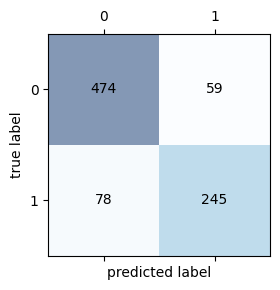

              precision    recall  f1-score   support

          -1       0.86      0.89      0.87       533
           1       0.81      0.76      0.78       323

    accuracy                           0.84       856
   macro avg       0.83      0.82      0.83       856
weighted avg       0.84      0.84      0.84       856



In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
confmat = confusion_matrix(y_test, predictions)
plot_confusion_matrix(confmat)
print(classification_report(y_test, predictions))